In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
popularity = pd.read_csv('popularity.csv')

In [24]:
popularity.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [25]:
popularity.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [26]:
popularity[' shares'].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name:  shares, dtype: float64

In [27]:
popularity[' shares'].quantile(q=0.78)

3100.0

In [28]:
sharePriceat95 = popularity[' shares'].quantile(q=0.95)
sharePriceat95

10800.0

In [29]:
popularity_low = popularity[popularity[' shares'] <= sharePriceat95]
popularity_low[' shares'].describe()

count    37663.000000
mean      2074.334387
std       1871.814139
min          1.000000
25%        927.000000
50%       1400.000000
75%       2400.000000
max      10800.000000
Name:  shares, dtype: float64

In [30]:
total = popularity[' shares'].count()
removed = (total - popularity_low[' shares'].count()) 

In [31]:
total, removed

(39644, 1981)

In [32]:
removed*100/total

4.996973060236101

In [33]:
nas = pd.read_csv('EDA_nas.csv')
nas.head()

,STUID,State,District,Gender,Age,Category,Same.language,Siblings,Handicap,Father.edu,...,Express.science.views,Watch.TV,Read.magazine,Read.a.book,Play.games,Help.in.household,Maths..,Reading..,Science..,Social..
0,26011001001,Maharashtra,1,Girl,13 years,3.0,2.0,1 sibling,No,Illiterate,...,Agree,Every day,Never,Once a month,Once a week,Every day,NaN,33.33,NaN,NaN
1,26011001002,Maharashtra,1,Girl,15 years,3.0,2.0,3 siblings,No,NaN,...,Agree,Once a week,Never,Never,Once a week,Every day,NaN,62.07,NaN,NaN
2,26011001003,Maharashtra,1,Girl,14 years,3.0,2.0,3 siblings,No,Degree & above,...,Agree,Every day,Once a month,Once a month,Once a week,Every day,NaN,41.38,NaN,NaN
3,26011001004,Maharashtra,1,Boy,13 years,3.0,2.0,3 siblings,No,Secondary,...,Agree,Every day,Every day,Never,Every day,Every day,29.82,NaN,NaN,NaN
4,26011001005,Maharashtra,1,Girl,14 years,3.0,2.0,2 siblings,No,Primary,...,Neither,Never,Never,Once a month,Once a week,Every day,NaN,NaN,27.27,NaN


In [34]:
nas.columns


Index(['STUID', 'State', 'District', 'Gender', 'Age', 'Category',
       'Same.language', 'Siblings', 'Handicap', 'Father.edu', 'Mother.edu',
       'Father.occupation', 'Mother.occupation', 'Below.poverty',
       'Use.calculator', 'Use.computer', 'Use.Internet', 'Use.dictionary',
       'Read.other.books', 'X..Books', 'Distance', 'Computer.use',
       'Library.use', 'Like.school', 'Subjects', 'Give.Lang.HW',
       'Give.Math.HW', 'Give.Scie.HW', 'Give.SoSc.HW', 'Correct.Lang.HW',
       'Correct.Math.HW', 'Correct.Scie.HW', 'Correct.SocS.HW',
       'Help.in.Study', 'Private.tuition', 'English.is.difficult',
       'Read.English', 'Dictionary.to.learn', 'Answer.English.WB',
       'Answer.English.aloud', 'Maths.is.difficult', 'Solve.Maths',
       'Solve.Maths.in.groups', 'Draw.geometry', 'Explain.answers',
       'SocSci.is.difficult', 'Historical.excursions', 'Participate.in.SocSci',
       'Small.groups.in.SocSci', 'Express.SocSci.views',
       'Science.is.difficult', 'Observe.

In [35]:
nas.groupby('Watch.TV')['Science..'].mean()

Watch.TV
Every day       36.357915
Never           35.638589
Once a month    36.786127
Once a week     36.467112
Name: Science.., dtype: float64

In [36]:
nas.groupby('Father.edu')['Maths..'].mean()

Father.edu
Degree & above    34.879193
Illiterate        29.126754
Primary           32.561137
Secondary         32.230393
Sr secondary      32.493415
Name: Maths.., dtype: float64

In [37]:
nas.groupby('Play.games')['Reading..'].mean()

Play.games
Every day       54.780136
Never           49.107484
Once a month    51.951193
Once a week     59.627034
Name: Reading.., dtype: float64

In [38]:
nas.groupby('Solve.Maths')['Maths..'].mean()

Solve.Maths
Agree       32.800920
Disagree    30.841321
Neither     29.384388
Name: Maths.., dtype: float64

In [39]:
nas.shape

(8801, 64)

In [40]:
cencus = pd.read_csv('EDA_census1.csv')
cencus.head()

,Table Name,State Code,District Code,Area Name,Type,Age-group,Total Persons,Total Males,Total Females,Illiterate Persons,...,Technical diploma Persons,Technical diploma Males,Technical diploma Females,Graduate Persons,Graduate Males,Graduate Females,Unclassified Persons,Unclassified Males,Unclassified Females,Unnamed: 45
0,C2308,0,0,INDIA,Total,All ages,1210854977,623270258,587584719,447216165,...,7238719,5354161,1884558,68288971,42120460,26168511,3031570,1647116,1384454,NaN
1,C2308,0,0,INDIA,Total,0-6,164515253,85752254,78762999,164515253,...,0,0,0,0,0,0,0,0,0,NaN
2,C2308,0,0,INDIA,Total,7,24826640,12903364,11923276,6748214,...,0,0,0,0,0,0,136465,75715,60750,NaN
3,C2308,0,0,INDIA,Total,8,26968373,14061937,12906436,4131414,...,0,0,0,0,0,0,96524,52561,43963,NaN
4,C2308,0,0,INDIA,Total,9,23424638,12214985,11209653,2491904,...,0,0,0,0,0,0,70452,38456,31996,NaN


In [41]:
cencus['Table Name'].value_counts()

Table Name
C2308    3132
Name: count, dtype: int64

In [42]:
cencus.groupby('Age-group')['Literate Persons'].sum() *100 / cencus.groupby('Age-group')['Total Persons'].sum()

Age-group
0-6                0.000000
10                88.693071
11                91.962826
12                91.421234
13                92.543554
14                91.682750
15                89.961344
16                89.783437
17                90.392562
18                86.665872
19                87.637647
20-24             83.235699
25-29             77.681141
30-34             72.538435
35-39             67.274016
40-44             62.993414
45-49             59.758607
50-54             57.565672
55-59             54.830491
60-64             46.926523
65-69             43.943993
7                 72.818658
70-74             39.774485
75-79             41.931327
8                 84.680522
80                38.963204
9                 89.362038
Age not stated    64.559417
All ages          63.066084
dtype: float64

In [43]:
z = cencus.groupby('Area Name')['Literate Females'].sum() * 100 / cencus.groupby('Area Name')['Total Females'].sum()
z.sort_values()

Area Name
State - BIHAR                        41.942968
State - RAJASTHAN                    44.206066
State - JHARKHAND                    46.367131
State - JAMMU & KASHMIR              47.495899
State - UTTAR PRADESH                48.423061
State - ARUNACHAL PRADESH            48.690609
State - MADHYA PRADESH               50.484341
State - CHHATTISGARH                 51.698178
State - ANDHRA PRADESH               52.933654
State - DADRA & NAGAR HAVELI         53.824300
INDIA                                55.970685
State - ODISHA                       56.125942
State - ASSAM                        56.395015
State - HARYANA                      57.392908
State - MEGHALAYA                    59.057108
State - KARNATAKA                    60.204679
State - GUJARAT                      60.861621
State - UTTARAKHAND                  60.972687
State - MANIPUR                      61.290791
State - WEST BENGAL                  62.337050
State - PUNJAB                       63.119362
Sta

In [44]:
y = cencus.groupby('Area Name')['Literate Persons'].sum() * 100 / cencus.groupby('Area Name')['Total Persons'].sum()
y.sort_values()

Area Name
State - BIHAR                        50.436916
State - ARUNACHAL PRADESH            55.358102
State - JHARKHAND                    55.559581
State - RAJASTHAN                    55.836841
State - JAMMU & KASHMIR              56.351669
State - UTTAR PRADESH                57.252497
State - MADHYA PRADESH               59.001861
State - ANDHRA PRADESH               59.773345
State - MEGHALAYA                    60.164199
State - CHHATTISGARH                 60.206705
State - ASSAM                        61.456892
INDIA                                63.066084
State - ODISHA                       63.711955
State - DADRA & NAGAR HAVELI         64.947383
State - HARYANA                      65.475466
State - KARNATAKA                    66.531016
State - MANIPUR                      66.828210
State - WEST BENGAL                  67.419917
State - PUNJAB                       67.429294
State - NAGALAND                     67.851031
State - GUJARAT                      67.990681
Sta

In [45]:
metal = pd.read_csv('EDA_Gold_Silver_prices.csv')
metal.head()

,Month,SilverPrice,GoldPrice
0,Mar-97,186.48,12619.24
1,Apr-97,170.65,12338.59
2,May-97,170.44,12314.94
3,Jun-97,169.96,12202.78
4,Jul-97,155.80,11582.07


In [46]:
metal[['SilverPrice', 'GoldPrice']].corr()

,SilverPrice,GoldPrice
SilverPrice,1.000000,0.954256
GoldPrice,0.954256,1.000000


In [47]:
import datetime
metal['Year'] = metal['Month'].apply(lambda x: x[4:])
metal['Month'] = metal['Month'].apply(lambda x: x[0:3])
metal.head()

,Month,SilverPrice,GoldPrice,Year
0,Mar,186.48,12619.24,97
1,Apr,170.65,12338.59,97
2,May,170.44,12314.94,97
3,Jun,169.96,12202.78,97
4,Jul,155.80,11582.07,97


In [48]:
metal08 = metal[metal['Year'] == '08']

In [49]:
metal08.head()

,Month,SilverPrice,GoldPrice,Year
130,Jan,632.29,35025.78,08
131,Feb,701.87,36642.46,08
132,Mar,775.49,39082.77,08
133,Apr,700.96,36416.00,08
134,May,718.20,37435.38,08


In [50]:
metal08[['GoldPrice', 'SilverPrice']].corr()

,GoldPrice,SilverPrice
GoldPrice,1.000000,0.009584
SilverPrice,0.009584,1.000000


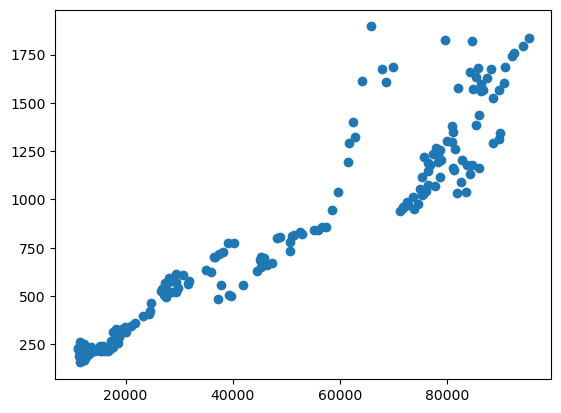

In [51]:
plt.scatter(metal['GoldPrice'], metal['SilverPrice'])

In [52]:
currencies = pd.read_csv('currencies.csv')
currencies.head()

,Currency,Chinese Yuan,Euro,Japanese Yen,U.K. Pound Sterling,U.S. Dollar,Algerian Dinar,Australian Dollar,Bahrain Dinar,Botswana Pula,...,South African Rand,Sri Lanka Rupee,Swedish Krona,Swiss Franc,Thai Baht,Trinidad And Tobago Dollar,Tunisian Dinar,U.A.E. Dirham,Peso Uruguayo,Bolivar Fuerte
0,"July 01, 2016",9.29446,1.25367,143.645,1.05054,1.39596,NaN,1.87126,0.524882,NaN,...,20.3528,202.763,11.8246,1.36009,NaN,9.28428,3.06035,5.12668,NaN,13.9247
1,"July 05, 2016",9.31515,1.25322,142.715,1.06143,1.39684,154.063,1.85825,0.525213,15.2162,...,20.6240,202.886,11.7627,1.35689,49.0655,9.26724,NaN,5.12992,42.9026,13.9335
2,"July 06, 2016",9.31697,1.25834,140.540,1.07300,1.39286,154.094,1.87313,0.523717,15.2392,...,20.7232,NaN,11.8805,1.36208,49.0692,9.25643,NaN,5.11527,42.6425,13.8938
3,"July 07, 2016",9.31315,1.25737,140.640,1.06911,1.39316,153.957,1.85236,0.523829,15.1430,...,20.4288,202.351,11.9192,1.36098,49.0295,NaN,NaN,5.11637,42.4176,13.8968
4,"July 08, 2016",9.31350,1.25797,140.510,1.07261,1.39257,154.062,1.85974,0.523607,15.1202,...,20.6063,202.271,11.9327,1.36472,49.0408,9.26432,NaN,5.11423,42.2060,13.8909


In [53]:
currencies = currencies.drop('Currency', axis = 1)

In [54]:
currencies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Chinese Yuan                11 non-null     float64
 1   Euro                        11 non-null     float64
 2   Japanese Yen                10 non-null     float64
 3   U.K. Pound Sterling         11 non-null     float64
 4   U.S. Dollar                 11 non-null     float64
 5   Algerian Dinar              9 non-null      float64
 6   Australian Dollar           11 non-null     float64
 7   Bahrain Dinar               11 non-null     float64
 8   Botswana Pula               9 non-null      float64
 9   Brazilian Real              11 non-null     float64
 10  Brunei Dollar               10 non-null     float64
 11  Canadian Dollar             10 non-null     float64
 12  Chilean Peso                11 non-null     float64
 13  Colombian Peso              11 non-nu

In [55]:
currencies['Colombian Peso'] = currencies['Colombian Peso'].apply(lambda x: float(x.replace(',','')))

In [56]:
currencies['Indonesian Rupiah'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 11 entries, 0 to 10
Series name: Indonesian Rupiah
Non-Null Count  Dtype 
--------------  ----- 
7 non-null      object
dtypes: object(1)
memory usage: 220.0+ bytes


In [57]:
currencies['Indonesian Rupiah'] = pd.to_numeric(currencies['Indonesian Rupiah'].str.replace(',', ''))

In [58]:
currencies['Indonesian Rupiah'].value_counts()

Indonesian Rupiah
18387.6    1
18220.7    1
18305.3    1
18227.3    1
18208.3    1
18240.9    1
18210.4    1
Name: count, dtype: int64

In [59]:
currencies['Indonesian Rupiah'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 11 entries, 0 to 10
Series name: Indonesian Rupiah
Non-Null Count  Dtype  
--------------  -----  
7 non-null      float64
dtypes: float64(1)
memory usage: 220.0 bytes


In [60]:
for col in currencies.columns:
    if currencies[col].dtype == object:
        currencies[col] = pd.to_numeric(currencies[col].str.replace(',', ''))



In [61]:
currencies.columns

Index(['Chinese Yuan', 'Euro', 'Japanese Yen', 'U.K. Pound Sterling',
       'U.S. Dollar', 'Algerian Dinar', 'Australian Dollar', 'Bahrain Dinar',
       'Botswana Pula', 'Brazilian Real', 'Brunei Dollar', 'Canadian Dollar',
       'Chilean Peso', 'Colombian Peso', 'Czech Koruna', 'Danish Krone',
       'Hungarian Forint', 'Icelandic Krona', 'Indian Rupee',
       'Indonesian Rupiah', 'Iranian Rial', 'Israeli New Sheqel',
       'Kazakhstani Tenge', 'Korean Won', 'Kuwaiti Dinar', 'Libyan Dinar',
       'Malaysian Ringgit', 'Mauritian Rupee', 'Mexican Peso',
       'Nepalese Rupee', 'New Zealand Dollar', 'Norwegian Krone', 'Rial Omani',
       'Pakistani Rupee', 'Nuevo Sol', 'Philippine Peso', 'Polish Zloty',
       'Qatar Riyal', 'Russian Ruble', 'Saudi Arabian Riyal',
       'Singapore Dollar', 'South African Rand', 'Sri Lanka Rupee',
       'Swedish Krona', 'Swiss Franc', 'Thai Baht',
       'Trinidad And Tobago Dollar', 'Tunisian Dinar', 'U.A.E. Dirham',
       'Peso Uruguayo', 'Bo

In [62]:
indian_corr = currencies[['Indian Rupee','Australian Dollar', 'U.S. Dollar', 'Japanese Yen', 'Euro', 'U.K. Pound Sterling', 'Chinese Yuan']].corr().head()

<Axes: >

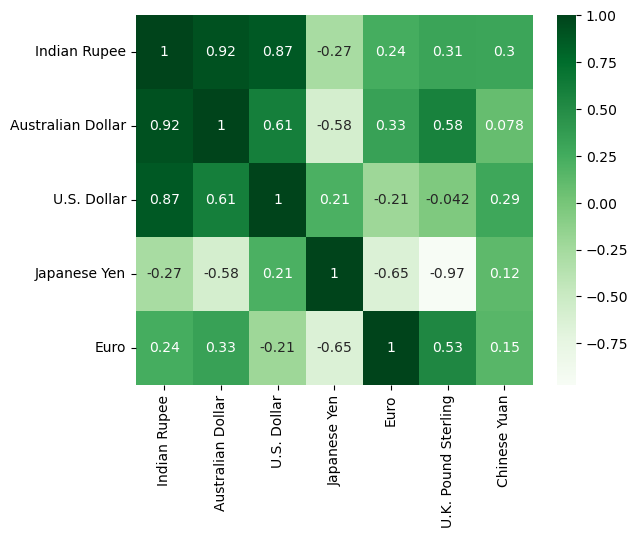

In [63]:
import seaborn as sns
sns.heatmap(indian_corr, cmap='Greens', annot=True)

In [64]:
nas = pd.read_csv('nas.csv')
nas.head()

,STUID,State,District,Gender,Age,Category,Same.language,Siblings,Handicap,Father.edu,...,Express.science.views,Watch.TV,Read.magazine,Read.a.book,Play.games,Help.in.household,Maths..,Reading..,Science..,Social..
0,26011001001,Maharashtra,1,Girl,13 years,3.0,2.0,1 sibling,No,Illiterate,...,Agree,Every day,Never,Once a month,Once a week,Every day,NaN,33.33,NaN,NaN
1,26011001002,Maharashtra,1,Girl,15 years,3.0,2.0,3 siblings,No,NaN,...,Agree,Once a week,Never,Never,Once a week,Every day,NaN,62.07,NaN,NaN
2,26011001003,Maharashtra,1,Girl,14 years,3.0,2.0,3 siblings,No,Degree & above,...,Agree,Every day,Once a month,Once a month,Once a week,Every day,NaN,41.38,NaN,NaN
3,26011001004,Maharashtra,1,Boy,13 years,3.0,2.0,3 siblings,No,Secondary,...,Agree,Every day,Every day,Never,Every day,Every day,29.82,NaN,NaN,NaN
4,26011001005,Maharashtra,1,Girl,14 years,3.0,2.0,2 siblings,No,Primary,...,Neither,Never,Never,Once a month,Once a week,Every day,NaN,NaN,27.27,NaN


In [65]:
nas.columns

Index(['STUID', 'State', 'District', 'Gender', 'Age', 'Category',
       'Same.language', 'Siblings', 'Handicap', 'Father.edu', 'Mother.edu',
       'Father.occupation', 'Mother.occupation', 'Below.poverty',
       'Use.calculator', 'Use.computer', 'Use.Internet', 'Use.dictionary',
       'Read.other.books', 'X..Books', 'Distance', 'Computer.use',
       'Library.use', 'Like.school', 'Subjects', 'Give.Lang.HW',
       'Give.Math.HW', 'Give.Scie.HW', 'Give.SoSc.HW', 'Correct.Lang.HW',
       'Correct.Math.HW', 'Correct.Scie.HW', 'Correct.SocS.HW',
       'Help.in.Study', 'Private.tuition', 'English.is.difficult',
       'Read.English', 'Dictionary.to.learn', 'Answer.English.WB',
       'Answer.English.aloud', 'Maths.is.difficult', 'Solve.Maths',
       'Solve.Maths.in.groups', 'Draw.geometry', 'Explain.answers',
       'SocSci.is.difficult', 'Historical.excursions', 'Participate.in.SocSci',
       'Small.groups.in.SocSci', 'Express.SocSci.views',
       'Science.is.difficult', 'Observe.

In [66]:
nas['Mother.edu'].value_counts(), nas['Siblings'].value_counts()

(Mother.edu
 Secondary         2591
 Illiterate        2545
 Primary           2220
 Sr secondary       433
 Degree & above     161
 Name: count, dtype: int64,
 Siblings
 2 siblings      2979
 1 sibling       2726
 3 siblings      1526
 4+ siblings     1167
 Single child     403
 Name: count, dtype: int64)

In [67]:
nas[nas['Mother.edu'] == 'Illiterate']['Siblings'].value_counts()

Siblings
2 siblings      923
1 sibling       533
3 siblings      532
4+ siblings     469
Single child     88
Name: count, dtype: int64

In [68]:
nas['Age'].value_counts()

Age
14 years     4349
13 years     2798
15 years      844
12 years      298
16+ years     264
11- years      16
Name: count, dtype: int64

In [69]:
nas = nas.drop(nas[nas['Age'] == '11- years'].index)

In [70]:
nas['Father.edu'].value_counts()

Father.edu
Secondary         2545
Primary           2427
Illiterate        2033
Sr secondary       790
Degree & above     338
Name: count, dtype: int64

In [71]:
nas['Science..'].value_counts()

Science..
34.55    286
30.91    276
32.73    268
29.09    268
27.27    256
36.36    227
38.18    216
23.64    214
25.45    204
40.00    185
21.82    151
43.64    143
45.45    138
41.82    130
20.00    114
50.91    111
49.09    106
47.27     97
54.55     85
52.73     84
18.18     66
16.36     62
58.18     47
60.00     46
56.36     45
14.55     35
63.64     30
61.82     26
65.45     24
69.09     22
72.73     21
67.27     21
12.73     20
74.55     14
70.91     14
10.91     13
80.00     11
76.36     11
9.09      10
78.18      8
7.27       8
81.82      6
5.45       5
1.82       4
85.45      3
0.00       3
3.64       2
83.64      1
Name: count, dtype: int64

In [72]:
nas.groupby(['Father.edu', 'Age'])['Science..'].mean()



Father.edu      Age      
Degree & above  12 years     46.752857
                13 years     44.805143
                14 years     42.676944
                15 years     29.090000
                16+ years    32.730000
Illiterate      12 years     29.870000
                13 years     33.758968
                14 years     35.319478
                15 years     33.413333
                16+ years    33.116786
Primary         12 years     34.121667
                13 years     37.617555
                14 years     36.700267
                15 years     35.162768
                16+ years    32.364000
Secondary       12 years     33.593810
                13 years     38.164402
                14 years     36.738859
                15 years     32.872800
                16+ years    30.960000
Sr secondary    12 years     40.113750
                13 years     39.046503
                14 years     39.050278
                15 years     38.615714
                16+ years    31.513333

In [73]:
nas.groupby('Father.edu')['Science..'].mean()

Father.edu
Degree & above    43.519872
Illiterate        34.469750
Primary           36.585876
Secondary         36.568685
Sr secondary      38.943013
Name: Science.., dtype: float64

In [74]:
nas.columns

Index(['STUID', 'State', 'District', 'Gender', 'Age', 'Category',
       'Same.language', 'Siblings', 'Handicap', 'Father.edu', 'Mother.edu',
       'Father.occupation', 'Mother.occupation', 'Below.poverty',
       'Use.calculator', 'Use.computer', 'Use.Internet', 'Use.dictionary',
       'Read.other.books', 'X..Books', 'Distance', 'Computer.use',
       'Library.use', 'Like.school', 'Subjects', 'Give.Lang.HW',
       'Give.Math.HW', 'Give.Scie.HW', 'Give.SoSc.HW', 'Correct.Lang.HW',
       'Correct.Math.HW', 'Correct.Scie.HW', 'Correct.SocS.HW',
       'Help.in.Study', 'Private.tuition', 'English.is.difficult',
       'Read.English', 'Dictionary.to.learn', 'Answer.English.WB',
       'Answer.English.aloud', 'Maths.is.difficult', 'Solve.Maths',
       'Solve.Maths.in.groups', 'Draw.geometry', 'Explain.answers',
       'SocSci.is.difficult', 'Historical.excursions', 'Participate.in.SocSci',
       'Small.groups.in.SocSci', 'Express.SocSci.views',
       'Science.is.difficult', 'Observe.

In [75]:
nas['Read.a.book'].value_counts()


Read.a.book
Never           2747
Once a week     2703
Every day       2617
Once a month     674
Name: count, dtype: int64

In [76]:
cust_rating = pd.read_csv('https://media-doselect.s3.amazonaws.com/generic/GvOkzy5MLdy9zJ8vXMArwpRvN/rating_final.csv')

cust_rating['avg_rating'] = round(cust_rating[['rating', 'food_rating', 'service_rating']].mean(axis=1))

print(cust_rating.head(10))

  userID  placeID  rating  food_rating  service_rating  avg_rating
0  U1077   135085       2            2               2         2.0
1  U1077   135038       2            2               1         2.0
2  U1077   132825       2            2               2         2.0
3  U1077   135060       1            2               2         2.0
4  U1068   135104       1            1               2         1.0
5  U1068   132740       0            0               0         0.0
6  U1068   132663       1            1               1         1.0
7  U1068   132732       0            0               0         0.0
8  U1068   132630       1            1               1         1.0
9  U1067   132584       2            2               2         2.0


In [77]:
odi_batting = pd.read_csv('odi-batting.csv')
odi_batting.head(10)

,Country,Player,Runs,MatchDate,Weekday,Ground,Versus,Balls
0,Afghanistan,Mohammad Shahzad,118,16-02-2010,Tue,Sharjah CA Stadium,Canada,121
1,Afghanistan,Mohammad Shahzad,110,01-09-2009,Tue,VRA Ground,Netherlands,111
2,Afghanistan,Mohammad Shahzad,100,16-08-2010,Mon,Cambusdoon New Ground,Scotland,72
3,Afghanistan,Mohammad Shahzad,82,10-07-2010,Sat,Hazelaarweg,Netherlands,108
4,Afghanistan,Mohammad Shahzad,57,01-07-2010,Thu,Sportpark Westvliet,Canada,57
5,Afghanistan,Mohammad Shahzad,55,07-07-2010,Wed,Sportpark Westvliet,Netherlands,63
6,Afghanistan,Mohammad Shahzad,37,09-10-2010,Sat,Gymkhana Club Ground,Kenya,46
7,Afghanistan,Mohammad Shahzad,34,09-07-2010,Fri,Hazelaarweg,Scotland,44
8,Afghanistan,Mohammad Shahzad,20,05-07-2010,Mon,VRA Ground,Kenya,22
9,Afghanistan,Mohammad Shahzad,16,30-08-2009,Sun,VRA Ground,Netherlands,28


In [78]:
odi_batting['No of centuries'] = odi_batting['Runs'].apply(lambda x: x//100)
odi_batting.head()

,Country,Player,Runs,MatchDate,Weekday,Ground,Versus,Balls,No of centuries
0,Afghanistan,Mohammad Shahzad,118,16-02-2010,Tue,Sharjah CA Stadium,Canada,121,1
1,Afghanistan,Mohammad Shahzad,110,01-09-2009,Tue,VRA Ground,Netherlands,111,1
2,Afghanistan,Mohammad Shahzad,100,16-08-2010,Mon,Cambusdoon New Ground,Scotland,72,1
3,Afghanistan,Mohammad Shahzad,82,10-07-2010,Sat,Hazelaarweg,Netherlands,108,0
4,Afghanistan,Mohammad Shahzad,57,01-07-2010,Thu,Sportpark Westvliet,Canada,57,0


In [79]:
odi_batting.groupby('Player')['No of centuries'].sum().sort_values(ascending=False)

Player
Sachin R Tendulkar     49
Ricky T Ponting        30
Sanath T Jayasuriya    28
Sourav C Ganguly       22
Herschelle H Gibbs     21
                       ..
Hasan Raza              0
Hasan Jamil             0
Hasan Durham            0
Harvir S Baidwan        0
Zulquarnain             0
Name: No of centuries, Length: 1883, dtype: int64

In [80]:
odi_batting.head()

,Country,Player,Runs,MatchDate,Weekday,Ground,Versus,Balls,No of centuries
0,Afghanistan,Mohammad Shahzad,118,16-02-2010,Tue,Sharjah CA Stadium,Canada,121,1
1,Afghanistan,Mohammad Shahzad,110,01-09-2009,Tue,VRA Ground,Netherlands,111,1
2,Afghanistan,Mohammad Shahzad,100,16-08-2010,Mon,Cambusdoon New Ground,Scotland,72,1
3,Afghanistan,Mohammad Shahzad,82,10-07-2010,Sat,Hazelaarweg,Netherlands,108,0
4,Afghanistan,Mohammad Shahzad,57,01-07-2010,Thu,Sportpark Westvliet,Canada,57,0


In [81]:
odi_batting['Strike Rate'] = odi_batting['Runs']/odi_batting['Balls']

In [82]:
odi_batting.head()

,Country,Player,Runs,MatchDate,Weekday,Ground,Versus,Balls,No of centuries,Strike Rate
0,Afghanistan,Mohammad Shahzad,118,16-02-2010,Tue,Sharjah CA Stadium,Canada,121,1,0.975207
1,Afghanistan,Mohammad Shahzad,110,01-09-2009,Tue,VRA Ground,Netherlands,111,1,0.990991
2,Afghanistan,Mohammad Shahzad,100,16-08-2010,Mon,Cambusdoon New Ground,Scotland,72,1,1.388889
3,Afghanistan,Mohammad Shahzad,82,10-07-2010,Sat,Hazelaarweg,Netherlands,108,0,0.759259
4,Afghanistan,Mohammad Shahzad,57,01-07-2010,Thu,Sportpark Westvliet,Canada,57,0,1.000000


In [83]:
odi_batting[odi_batting['No of centuries'] > 0].sort_values('Strike Rate', ascending=False)

,Country,Player,Runs,MatchDate,Weekday,Ground,Versus,Balls,No of centuries,Strike Rate
28157,Pakistan,Shahid Afridi,102,04-10-1996,Fri,Gymkhana Club Ground,Sri Lanka,40,1,2.550000
28158,Pakistan,Shahid Afridi,102,15-04-2005,Fri,Green Park,India,46,1,2.217391
34446,South Africa,Mark V Boucher,147,20-09-2006,Wed,Senwes Park,Zimbabwe,68,1,2.161765
28153,Pakistan,Shahid Afridi,124,21-06-2010,Mon,Rangiri Dambulla International Stad.,Bangladesh,60,1,2.066667
36753,Sri Lanka,Sanath T Jayasuriya,134,02-04-1996,Tue,Padang Cricket Ground,Pakistan,65,1,2.061538
...,...,...,...,...,...,...,...,...,...,...
28851,Pakistan,Ramiz Raja,102,23-02-1992,Sun,Melbourne Cricket Ground,West Indies,158,1,0.645570
24821,New Zealand,Glenn M Turner,114,14-06-1975,Sat,Old Trafford,India,177,1,0.644068
43594,West Indies,Cuthbert Gordon Greenidge,103,21-11-1981,Sat,Melbourne Cricket Ground,Pakistan,161,1,0.639752
43591,West Indies,Cuthbert Gordon Greenidge,106,09-06-1979,Sat,Edgbaston,India,173,1,0.612717


In [84]:
odi_batting['Year'] = odi_batting['MatchDate'].apply(lambda x: x[-4:])
odi_batting.head()

,Country,Player,Runs,MatchDate,Weekday,Ground,Versus,Balls,No of centuries,Strike Rate,Year
0,Afghanistan,Mohammad Shahzad,118,16-02-2010,Tue,Sharjah CA Stadium,Canada,121,1,0.975207,2010
1,Afghanistan,Mohammad Shahzad,110,01-09-2009,Tue,VRA Ground,Netherlands,111,1,0.990991,2009
2,Afghanistan,Mohammad Shahzad,100,16-08-2010,Mon,Cambusdoon New Ground,Scotland,72,1,1.388889,2010
3,Afghanistan,Mohammad Shahzad,82,10-07-2010,Sat,Hazelaarweg,Netherlands,108,0,0.759259,2010
4,Afghanistan,Mohammad Shahzad,57,01-07-2010,Thu,Sportpark Westvliet,Canada,57,0,1.000000,2010


In [85]:
odi_batting[odi_batting['Country'] == 'India'].groupby('Year')['No of centuries'].sum().sort_values(ascending=False)

Year
1998    18
1999    15
2010    13
2009    13
2005    11
2003    10
2008    10
2000    10
2002     9
2001     9
2011     8
1996     8
2004     7
1994     7
1997     7
1988     5
2006     5
2007     5
1987     4
1984     3
1990     3
1993     2
1991     2
1989     2
1986     2
1995     1
1992     1
1983     1
1975     0
1985     0
1982     0
1981     0
1980     0
1979     0
1978     0
1976     0
1974     0
Name: No of centuries, dtype: int64

In [86]:
import pandas as pd
order = pd.read_csv('https://media-doselect.s3.amazonaws.com/generic/0gjkvLLgNdQLqG10jo5yyJyjK/orders_dimen.csv')
order['Order_Date'] = pd.to_datetime(order['Order_Date'])

order['day'] = order['Order_Date'].dt.day

print(order.head(10))

   Order_ID Order_Date Order_Priority  Ord_id  day
0         3 2010-10-13            LOW   Ord_1   13
1       293 2012-10-01           HIGH   Ord_2    1
2       483 2011-07-10           HIGH   Ord_3   10
3       515 2010-08-28  NOT SPECIFIED   Ord_4   28
4       613 2011-06-17           HIGH   Ord_5   17
5       643 2011-03-24           HIGH   Ord_6   24
6       678 2010-02-26            LOW   Ord_7   26
7       807 2010-11-23         MEDIUM   Ord_8   23
8       868 2012-06-08  NOT SPECIFIED   Ord_9    8
9       933 2012-08-04  NOT SPECIFIED  Ord_10    4


/var/folders/7d/_tknpwq147sc6bnrbrx98d6c0000gn/T/ipykernel_66195/2786440256.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  order['Order_Date'] = pd.to_datetime(order['Order_Date'])


In [87]:
grades = pd.read_csv('grades.csv')
grades.head()

,submission,submit_time
0,https://ckd.upgrad.com/UpGrad/73ba5189-94fd-44...,01/03/17-20:28:52
1,https://ckd.upgrad.com/UpGrad/185242ff-7508-4c...,01/03/17-20:18:21
2,https://ckd.upgrad.com/UpGrad/a353d129-c100-43...,01/03/17-22:37:08
3,https://ckd.upgrad.com/UpGrad/002fc912-faa1-49...,01/02/17-21:43:19
4,https://ckd.upgrad.com/UpGrad/25cbc4a4-6d49-4f...,01/03/17-15:27:49


In [88]:
grades.iloc[1].submission

'https://ckd.upgrad.com/UpGrad/185242ff-7508-4cc4-afa3-5865733ba1d4/DDA1610288.zip'

In [89]:
grades['fileName'] = grades['submission'].apply(lambda x: x.split('/')[-1])
grades['uuid'] = grades['submission'].apply(lambda x: x.split('/')[-2])
grades['rollno'] = grades['fileName'].apply(lambda x: x.split('.')[0])
grades['fileformat'] = grades['fileName'].apply(lambda x: x.split('.')[1])
grades.head()

,submission,submit_time,fileName,uuid,rollno,fileformat
0,https://ckd.upgrad.com/UpGrad/73ba5189-94fd-44...,01/03/17-20:28:52,DDA1610095.zip,73ba5189-94fd-44aa-88d3-6b36aaa69b02,DDA1610095,zip
1,https://ckd.upgrad.com/UpGrad/185242ff-7508-4c...,01/03/17-20:18:21,DDA1610288.zip,185242ff-7508-4cc4-afa3-5865733ba1d4,DDA1610288,zip
2,https://ckd.upgrad.com/UpGrad/a353d129-c100-43...,01/03/17-22:37:08,DDA1610106.zip,a353d129-c100-4342-aa95-a7018ff93150,DDA1610106,zip
3,https://ckd.upgrad.com/UpGrad/002fc912-faa1-49...,01/02/17-21:43:19,DDA1610261.zip,002fc912-faa1-4948-9358-fcdabfd7669c,DDA1610261,zip
4,https://ckd.upgrad.com/UpGrad/25cbc4a4-6d49-4f...,01/03/17-15:27:49,DDA1610028.zip,25cbc4a4-6d49-4ffa-9bf1-06bdb1a7cf8f,DDA1610028,zip


In [90]:
grades['year'] = pd.to_datetime(grades.submit_time).dt.year
grades['month'] = pd.to_datetime(grades.submit_time).dt.month
grades['day'] = pd.to_datetime(grades.submit_time).dt.day
grades['hour'] = pd.to_datetime(grades.submit_time).dt.time
grades.head()


/var/folders/7d/_tknpwq147sc6bnrbrx98d6c0000gn/T/ipykernel_66195/330445682.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  grades['year'] = pd.to_datetime(grades.submit_time).dt.year
/var/folders/7d/_tknpwq147sc6bnrbrx98d6c0000gn/T/ipykernel_66195/330445682.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  grades['month'] = pd.to_datetime(grades.submit_time).dt.month
/var/folders/7d/_tknpwq147sc6bnrbrx98d6c0000gn/T/ipykernel_66195/330445682.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  grades['day'] = pd.to_datetime(grades.submit_time).dt.day
/var/folders/7d/_tk

,submission,submit_time,fileName,uuid,rollno,fileformat,year,month,day,hour
0,https://ckd.upgrad.com/UpGrad/73ba5189-94fd-44...,01/03/17-20:28:52,DDA1610095.zip,73ba5189-94fd-44aa-88d3-6b36aaa69b02,DDA1610095,zip,2017,1,3,20:28:52
1,https://ckd.upgrad.com/UpGrad/185242ff-7508-4c...,01/03/17-20:18:21,DDA1610288.zip,185242ff-7508-4cc4-afa3-5865733ba1d4,DDA1610288,zip,2017,1,3,20:18:21
2,https://ckd.upgrad.com/UpGrad/a353d129-c100-43...,01/03/17-22:37:08,DDA1610106.zip,a353d129-c100-4342-aa95-a7018ff93150,DDA1610106,zip,2017,1,3,22:37:08
3,https://ckd.upgrad.com/UpGrad/002fc912-faa1-49...,01/02/17-21:43:19,DDA1610261.zip,002fc912-faa1-4948-9358-fcdabfd7669c,DDA1610261,zip,2017,1,2,21:43:19
4,https://ckd.upgrad.com/UpGrad/25cbc4a4-6d49-4f...,01/03/17-15:27:49,DDA1610028.zip,25cbc4a4-6d49-4ffa-9bf1-06bdb1a7cf8f,DDA1610028,zip,2017,1,3,15:27:49


In [91]:
grades.groupby('fileformat').count()

,submission,submit_time,fileName,uuid,rollno,year,month,day,hour
fileformat,,,,,,,,,
7z,2,2,2,2,2,2,2,2,2
R,7,7,7,7,7,7,7,7,7
zip,189,189,189,189,189,189,189,189,189


In [92]:
grades.head()

,submission,submit_time,fileName,uuid,rollno,fileformat,year,month,day,hour
0,https://ckd.upgrad.com/UpGrad/73ba5189-94fd-44...,01/03/17-20:28:52,DDA1610095.zip,73ba5189-94fd-44aa-88d3-6b36aaa69b02,DDA1610095,zip,2017,1,3,20:28:52
1,https://ckd.upgrad.com/UpGrad/185242ff-7508-4c...,01/03/17-20:18:21,DDA1610288.zip,185242ff-7508-4cc4-afa3-5865733ba1d4,DDA1610288,zip,2017,1,3,20:18:21
2,https://ckd.upgrad.com/UpGrad/a353d129-c100-43...,01/03/17-22:37:08,DDA1610106.zip,a353d129-c100-4342-aa95-a7018ff93150,DDA1610106,zip,2017,1,3,22:37:08
3,https://ckd.upgrad.com/UpGrad/002fc912-faa1-49...,01/02/17-21:43:19,DDA1610261.zip,002fc912-faa1-4948-9358-fcdabfd7669c,DDA1610261,zip,2017,1,2,21:43:19
4,https://ckd.upgrad.com/UpGrad/25cbc4a4-6d49-4f...,01/03/17-15:27:49,DDA1610028.zip,25cbc4a4-6d49-4ffa-9bf1-06bdb1a7cf8f,DDA1610028,zip,2017,1,3,15:27:49


In [93]:
grades[(grades['submit_time']>'01/03/17-23:59:59') & (grades['year'] >=2017)].count()

submission     44
submit_time    44
fileName       44
uuid           44
rollno         44
fileformat     44
year           44
month          44
day            44
hour           44
dtype: int64

In [94]:
grades.shape


(198, 10)

In [95]:
grades.head()

,submission,submit_time,fileName,uuid,rollno,fileformat,year,month,day,hour
0,https://ckd.upgrad.com/UpGrad/73ba5189-94fd-44...,01/03/17-20:28:52,DDA1610095.zip,73ba5189-94fd-44aa-88d3-6b36aaa69b02,DDA1610095,zip,2017,1,3,20:28:52
1,https://ckd.upgrad.com/UpGrad/185242ff-7508-4c...,01/03/17-20:18:21,DDA1610288.zip,185242ff-7508-4cc4-afa3-5865733ba1d4,DDA1610288,zip,2017,1,3,20:18:21
2,https://ckd.upgrad.com/UpGrad/a353d129-c100-43...,01/03/17-22:37:08,DDA1610106.zip,a353d129-c100-4342-aa95-a7018ff93150,DDA1610106,zip,2017,1,3,22:37:08
3,https://ckd.upgrad.com/UpGrad/002fc912-faa1-49...,01/02/17-21:43:19,DDA1610261.zip,002fc912-faa1-4948-9358-fcdabfd7669c,DDA1610261,zip,2017,1,2,21:43:19
4,https://ckd.upgrad.com/UpGrad/25cbc4a4-6d49-4f...,01/03/17-15:27:49,DDA1610028.zip,25cbc4a4-6d49-4ffa-9bf1-06bdb1a7cf8f,DDA1610028,zip,2017,1,3,15:27:49


In [96]:
grades['date'] = pd.to_datetime(grades['submit_time']).dt.date

/var/folders/7d/_tknpwq147sc6bnrbrx98d6c0000gn/T/ipykernel_66195/3479455621.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  grades['date'] = pd.to_datetime(grades['submit_time']).dt.date


In [97]:
grades['index_col'] = grades.index
grades.head()


,submission,submit_time,fileName,uuid,rollno,fileformat,year,month,day,hour,date,index_col
0,https://ckd.upgrad.com/UpGrad/73ba5189-94fd-44...,01/03/17-20:28:52,DDA1610095.zip,73ba5189-94fd-44aa-88d3-6b36aaa69b02,DDA1610095,zip,2017,1,3,20:28:52,2017-01-03,0
1,https://ckd.upgrad.com/UpGrad/185242ff-7508-4c...,01/03/17-20:18:21,DDA1610288.zip,185242ff-7508-4cc4-afa3-5865733ba1d4,DDA1610288,zip,2017,1,3,20:18:21,2017-01-03,1
2,https://ckd.upgrad.com/UpGrad/a353d129-c100-43...,01/03/17-22:37:08,DDA1610106.zip,a353d129-c100-4342-aa95-a7018ff93150,DDA1610106,zip,2017,1,3,22:37:08,2017-01-03,2
3,https://ckd.upgrad.com/UpGrad/002fc912-faa1-49...,01/02/17-21:43:19,DDA1610261.zip,002fc912-faa1-4948-9358-fcdabfd7669c,DDA1610261,zip,2017,1,2,21:43:19,2017-01-02,3
4,https://ckd.upgrad.com/UpGrad/25cbc4a4-6d49-4f...,01/03/17-15:27:49,DDA1610028.zip,25cbc4a4-6d49-4ffa-9bf1-06bdb1a7cf8f,DDA1610028,zip,2017,1,3,15:27:49,2017-01-03,4


In [98]:
grades.groupby('date')['index_col'].count().sort_values(ascending=False)

date
2017-01-03    120
2017-01-09     21
2017-01-02     14
2017-01-04     12
2016-12-30      6
2017-01-01      6
2017-01-10      3
2017-01-08      3
2017-01-07      2
2016-12-28      2
2016-12-29      2
2017-01-17      1
2016-11-19      1
2017-01-06      1
2016-12-19      1
2016-12-31      1
2016-12-21      1
2017-02-03      1
Name: index_col, dtype: int64

In [99]:
grades['ahora'] = grades['hour'].apply(lambda x: x.hour)
grades.head()

,submission,submit_time,fileName,uuid,rollno,fileformat,year,month,day,hour,date,index_col,ahora
0,https://ckd.upgrad.com/UpGrad/73ba5189-94fd-44...,01/03/17-20:28:52,DDA1610095.zip,73ba5189-94fd-44aa-88d3-6b36aaa69b02,DDA1610095,zip,2017,1,3,20:28:52,2017-01-03,0,20
1,https://ckd.upgrad.com/UpGrad/185242ff-7508-4c...,01/03/17-20:18:21,DDA1610288.zip,185242ff-7508-4cc4-afa3-5865733ba1d4,DDA1610288,zip,2017,1,3,20:18:21,2017-01-03,1,20
2,https://ckd.upgrad.com/UpGrad/a353d129-c100-43...,01/03/17-22:37:08,DDA1610106.zip,a353d129-c100-4342-aa95-a7018ff93150,DDA1610106,zip,2017,1,3,22:37:08,2017-01-03,2,22
3,https://ckd.upgrad.com/UpGrad/002fc912-faa1-49...,01/02/17-21:43:19,DDA1610261.zip,002fc912-faa1-4948-9358-fcdabfd7669c,DDA1610261,zip,2017,1,2,21:43:19,2017-01-02,3,21
4,https://ckd.upgrad.com/UpGrad/25cbc4a4-6d49-4f...,01/03/17-15:27:49,DDA1610028.zip,25cbc4a4-6d49-4ffa-9bf1-06bdb1a7cf8f,DDA1610028,zip,2017,1,3,15:27:49,2017-01-03,4,15


In [100]:
grades.groupby('ahora')['index_col'].count().sort_values(ascending=False)

ahora
23    66
21    27
22    24
20    16
0     10
1      8
13     6
18     6
14     6
17     4
15     4
12     3
10     3
3      3
16     2
19     2
4      2
2      2
11     1
8      1
9      1
6      1
Name: index_col, dtype: int64

<Axes: xlabel='ahora', ylabel='Count'>

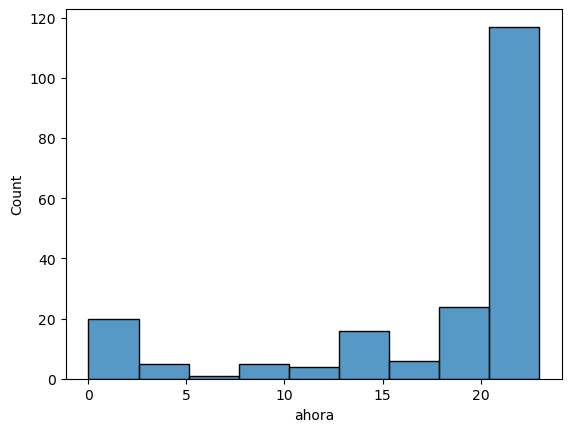

In [101]:
sns.histplot(grades['ahora'])